In [1]:
import pandas as pd
from chainconsumer import ChainConsumer
import textwrap

# Function to wrap text
def wrap_text(text, width=20):
    return '\n'.join(textwrap.fill(text, width=width).split(' '))

bxa_df = pd.read_csv("results_df/bxa.csv").drop(columns=['Unnamed: 0']) #'results_df/bxa.csv'
#"../summary_stats/results_df/sixsa_mri_summary.csv"
sixsa_mri_df = pd.read_csv('results_df/sixsa_mri_summary.csv').drop(columns=['Unnamed: 0'])
#sixa_sri_df = pd.read_csv('results_df/bxa.csv').drop(columns=['Unnamed: 0'])
for df in [bxa_df, sixsa_mri_df]:
    df.columns = [wrap_text(col) for col in df.columns]


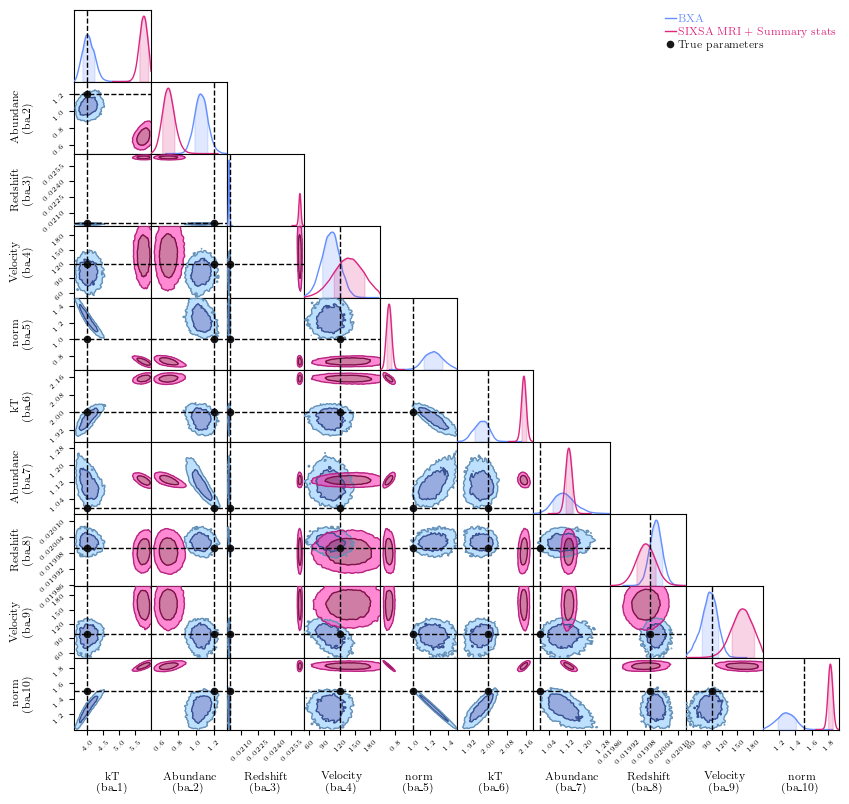

In [2]:
from chainconsumer import Chain, ChainConsumer, Truth

colors = ["#fe6100", "#785ef0", "#ffb000",  "#dc267f",  "#648fff"]

truth_loc = {
    wrap_text("kT (ba_1)"): 4,
    wrap_text("Abundanc (ba_2)"): 1.2,
    wrap_text("Redshift (ba_3)"): 0.02,
    wrap_text("Velocity (ba_4)"): 120,
    wrap_text("norm (ba_5)"): 1,
    wrap_text("kT (ba_6)"): 2,
    wrap_text("Abundanc (ba_7)"): 1,
    wrap_text("Redshift (ba_8)"): 0.02,
    wrap_text("Velocity (ba_9)"): 100,
    wrap_text("norm (ba_10)"): 1.5,
}

bxa_chain = Chain(samples=bxa_df, name="BXA", color=colors[4])
sixsa_mri_chain = Chain(samples=sixsa_mri_df, name="SIXSA MRI + Summary stats", color=colors[3])


from chainconsumer import PlotConfig

cc = ChainConsumer()

cc.set_plot_config(
    PlotConfig(
        usetex=True,
        label_font_size=8,
        tick_font_size=5,
        serif=True,
    )
)

cc.add_chain(bxa_chain)
cc.add_chain(sixsa_mri_chain)
cc.add_marker(location=truth_loc, name="True parameters", color="black", marker_style="o", marker_size=20)
cc.add_truth(Truth(location=truth_loc, color="black"))
fig = cc.plotter.plot(figsize=(9, 9))
fig.align_ylabels()
fig.align_xlabels()
fig.savefig("figures/bxa_comparison.pdf", bbox_inches='tight')